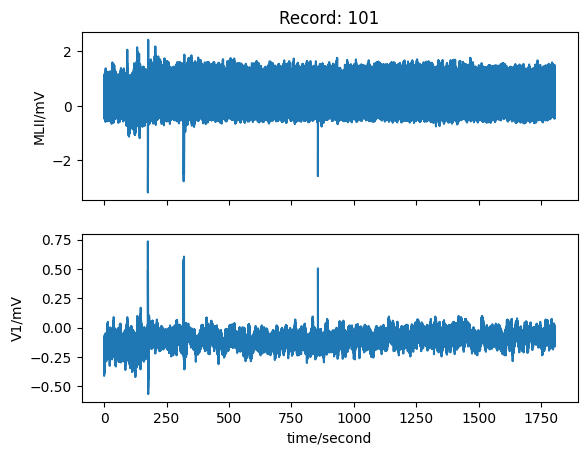

In [16]:
# import the WFDB package
import wfdb

# load a record using the 'rdrecord' function
record = wfdb.rdrecord('../data_v2/101')

# plot the record to screen
wfdb.plot_wfdb(record=record)

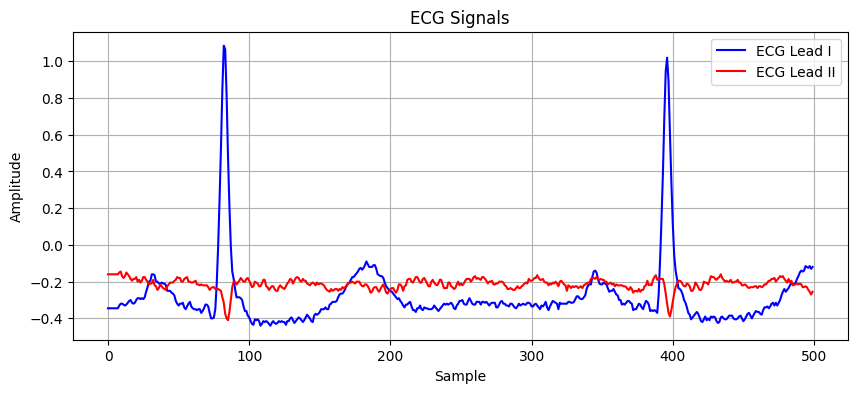

In [17]:
import wfdb
import matplotlib.pyplot as plt
import os 
# Specify the record name
record_name = '../data_v2/101'

# Load the record
record = wfdb.rdrecord(record_name)

# Plot ECG signals
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[:500, 0], color='b', label='ECG Lead I')
plt.plot(record.p_signal[:500, 1], color='r', label='ECG Lead II')
plt.title('ECG Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


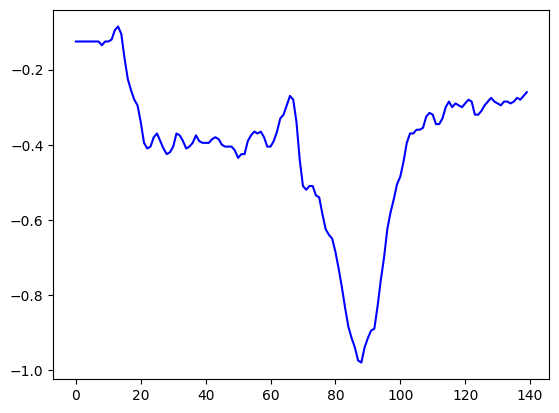

In [99]:
plt.plot(record.p_signal[:140, 0], color='b', label='ECG Lead I')

In [19]:
import wfdb
import os

# Specify the directory containing the dataset
data_dir = '../data_v2'

# Read the annotation file for the record '101'
annotation = wfdb.rdann(os.path.join(data_dir, '100'), 'atr')

# Print the annotation symbols
print("Annotation symbols:", set(annotation.symbol))

Annotation symbols: {'+', 'V', 'N', 'A'}


In [20]:
import os
import wfdb

# Path to the directory containing the MIT-BIH Arrhythmia Database files
mit_bih_dir = '../data_v2'

# List all annotation files in the directory
annotation_files = [file for file in os.listdir(mit_bih_dir) if file.endswith('.atr')]

# Initialize a set to store unique annotation symbols (classes)
class_names = set()

# Loop through each annotation file
for annotation_file in annotation_files:
    # Extract record name from the annotation file name
    record_name = os.path.splitext(annotation_file)[0]

    # Read the annotations
    annotation = wfdb.rdann(os.path.join(mit_bih_dir, record_name), 'atr')

    # Get the unique symbols in this record and add them to the set
    class_names.update(set(annotation.symbol))

# Print the unique annotation symbols (classes)
print("Classes in the MIT-BIH Arrhythmia Database:", class_names)


Classes in the MIT-BIH Arrhythmia Database: {'V', 'Q', 'e', '"', '!', '~', '|', '[', 'S', 'a', '/', 'f', 'R', 'A', 'N', 'J', 'F', 'E', 'x', ']', '+', 'j', 'L'}


In [21]:
# !wget "https://raw.githubusercontent.com/HugoGuillen/arff2pandas/master/arff2pandas.py" -O arff2pandas.py
import arff2pandas as a2p
import pandas as pd

with open("../data_v1/ECG5000_TRAIN.arff") as f:
    train = a2p.load(f)
with open("../data_v1/ECG5000_TEST.arff") as f:
    test = a2p.load(f)

df = pd.concat([train, test]).sample(frac=1.0)
df.head()

/Users/harishankarvs/Desktop/miniproj2/notebooks/arff2pandas.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df_str.columns] = df_str.applymap(lambda x:x.decode('utf-8'))
/Users/harishankarvs/Desktop/miniproj2/notebooks/arff2pandas.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df_str.columns] = df_str.applymap(lambda x:x.decode('utf-8'))


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
1028,-0.757178,-3.396066,-4.089193,-4.307271,-3.673054,-2.558748,-1.797710,-1.558311,-0.826008,-0.454440,...,0.986183,1.317548,1.045827,1.000235,0.720204,0.724679,0.554332,0.991150,0.886523,1
1913,1.077155,-1.596928,-3.319764,-4.452594,-4.695715,-4.275985,-2.924932,-1.672264,-1.685766,-0.766774,...,0.667291,0.947848,1.177247,1.428348,1.196461,1.017187,1.148445,2.391071,0.515531,1
609,0.806375,-1.442752,-3.378634,-4.232887,-4.058717,-3.456271,-2.554740,-1.715130,-1.547720,-0.912793,...,0.875463,1.126348,1.168129,1.138603,0.987427,1.472311,1.984837,1.204326,-1.486320,1
1259,0.755267,-1.406502,-3.296771,-3.911586,-3.503480,-3.086567,-2.208383,-1.676585,-1.548105,-0.889179,...,0.919287,1.180678,1.666471,1.778196,1.573195,1.628413,1.949075,1.991942,0.255325,1
3943,0.838369,0.085425,-0.815808,-1.693580,-2.360700,-2.917058,-3.202503,-3.143541,-2.631633,-2.015137,...,-1.593843,-2.146953,-2.813190,-3.502176,-3.383615,-2.650521,-1.370550,-0.429688,0.471695,2


<Axes: >

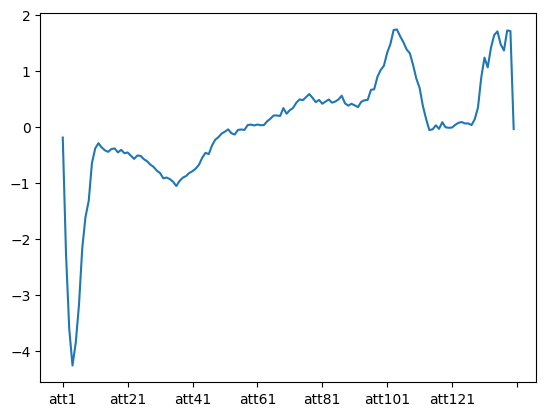

In [119]:
df[df['target']=='1'].iloc[140, :-1].plot() # normal

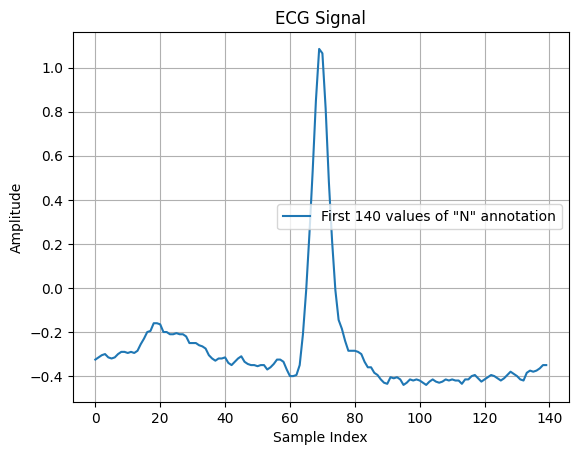

In [123]:
import os
import wfdb
import matplotlib.pyplot as plt

# Path to the directory containing the MIT-BIH Arrhythmia Database files
mit_bih_dir = '../data_v2'

# Record name and annotation symbol of interest
record_name = '101'
annotation_symbol = 'N'  # For normal beats

# Read the signal file
record = wfdb.rdrecord(os.path.join(mit_bih_dir, record_name))

# Extract ECG signal data
ecg_signals = record.p_signal

# Read the annotation file
annotation = wfdb.rdann(os.path.join(mit_bih_dir, record_name), 'atr')

# Find the index of the first occurrence of the specific annotation symbol
index_of_first_n = annotation.symbol.index(annotation_symbol)

# Get the sample index of the first occurrence of the specific annotation symbol
sample_index_of_first_n = annotation.sample[index_of_first_n]

# Extract the first 140 signal values starting from the sample index of the first "N" annotation
start_index = max(0, sample_index_of_first_n - 70)  # Get 70 samples before the annotation
end_index = min(len(ecg_signals), sample_index_of_first_n + 70)  # Get 70 samples after the annotation
signal_values = ecg_signals[start_index:end_index, 0]  # Assuming ecg_signals is 2D, adjust indexing if needed

# Plot the signal values
plt.plot(signal_values, label=f'First 140 values of "{annotation_symbol}" annotation')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
annotation.__dict__

{'record_name': '108',
 'extension': 'atr',
 'sample': array([    23,     88,    442, ..., 649170, 649471, 649769]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'x',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  '~',
  'N',
  'N',
  '~',
  'N',
  'V',
  'x',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

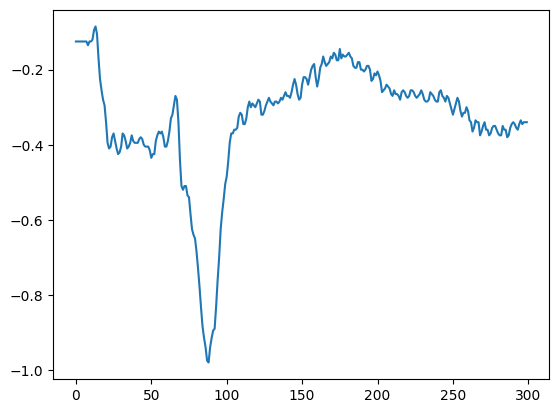

In [116]:
plt.plot(ecg_signals[:300, 0])